In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
X_train_tfidf = pd.read_csv("X_train_tfidf.csv", delimiter= ',')
X_test_tfidf = pd.read_csv("X_test_tfidf.csv", delimiter= ',')
y_train = pd.read_csv("y_train.csv", delimiter= ',')
y_test = pd.read_csv("y_test.csv", delimiter= ',')


In [3]:
y_train

,Fake
0,1
1,0
2,1
3,1
4,1
...,...
1275,1
1276,0
1277,1
1278,0


In [4]:
y_test

,Fake
0,1
1,1
2,0
3,1
4,0
...,...
315,0
316,1
317,1
318,1


In [69]:

def model_eval(models, models_name, X_train_tfidf, y_train, X_test_tfidf, y_test):
    train_acc_list = []
    test_acc_list = []
    F1_list = []
    fpr_tpr_list = []
    auc_list = []
    for i, model in enumerate(models):
        model.fit(X_train_tfidf, np.ravel(y_train))
        # accuracy score on the training data
        X_train_prediction = model.predict(X_train_tfidf)

        training_data_accuracy = accuracy_score(X_train_prediction, y_train)
        #print('Accuracy score of the training data : ', training_data_accuracy)
        train_acc_list.append(training_data_accuracy)

        #print(classification_report(y_train, X_train_prediction))
        '''
        cm1 = confusion_matrix(y_train, X_train_prediction)
        ax = plt.subplot()
        sn.set(font_scale=1.4 ) # for label size
        sn.heatmap(cm1, annot=True, fmt='d', ax=ax, cmap='Blues') # font size
        temp_title = str(model) + " in training"
        ax.set_title(temp_title)
        ax.set_ylabel('Actual')
        ax.set_xlabel('Predicted')
        plt.show()
        '''

        # accuracy score on the test data
        X_test_prediction = model.predict(X_test_tfidf)

        test_data_accuracy = accuracy_score(X_test_prediction, y_test)
        #print('Accuracy score of the test data : ', test_data_accuracy)
        test_acc_list.append(test_data_accuracy)

        #print(classification_report(y_test, X_test_prediction))
        temp_report = classification_report(y_test, X_test_prediction, output_dict=True)
        #print(temp_report["weighted avg"]["f1-score"])
        F1_list.append(temp_report["weighted avg"]["f1-score"])

        cm2 = confusion_matrix(y_test, X_test_prediction)
        ax = plt.subplot()
        sn.set(font_scale=1.4 ) # for label size
        sn.heatmap(cm2, annot=True, fmt='d', ax=ax, cmap='Blues') # font size
        #temp_title = str(model) + " in testing"
        ax.set_title(models_name[i])
        ax.set_ylabel('Actual')
        ax.set_xlabel('Predicted')
        plt.show()

        fpr, tpr, _ = roc_curve(y_test, X_test_prediction)
        fpr_tpr_list.append([fpr, tpr])

        auc_list.append(auc(fpr, tpr))


    list_of_tuples = list(zip(models_name, train_acc_list, test_acc_list, F1_list, auc_list))

    df = pd.DataFrame(list_of_tuples, columns=["Model", 'Train Accuracy', 'Test Accuracy', 'F1 Score', 'AUC score'])
    
    fpr, tpr, _ = roc_curve(y_test, X_test_prediction)
    #create ROC curve
    for i, fpr_tpr in enumerate(fpr_tpr_list):
        plt.plot(fpr_tpr[0],fpr_tpr[1], label=models_name[i])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    return df

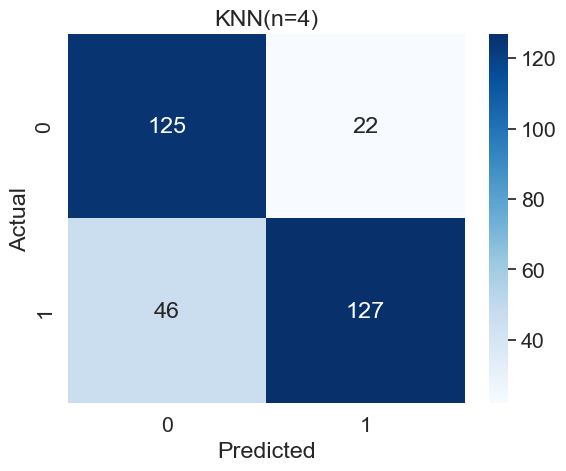

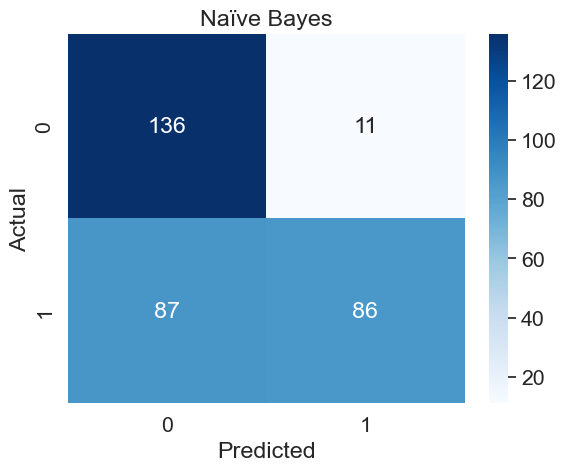

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


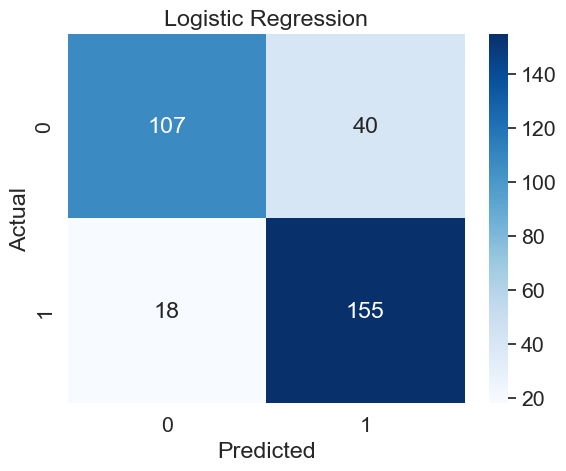

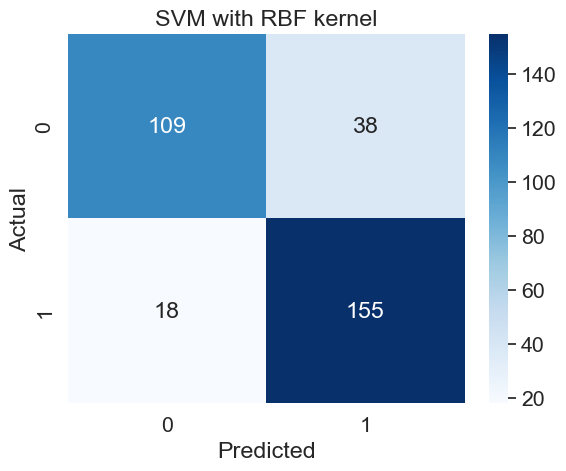

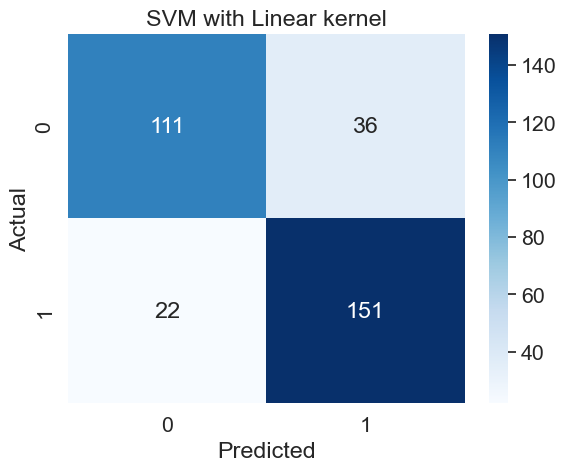

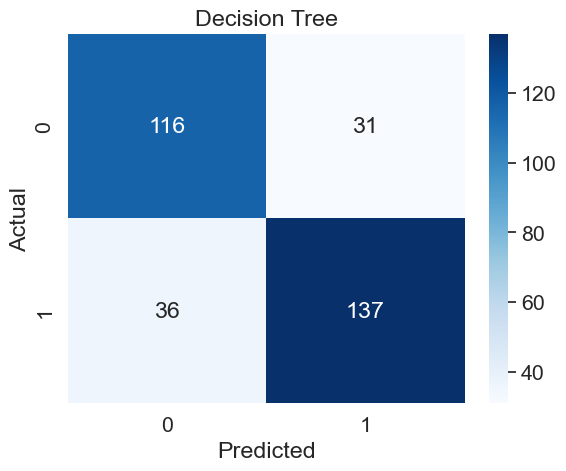

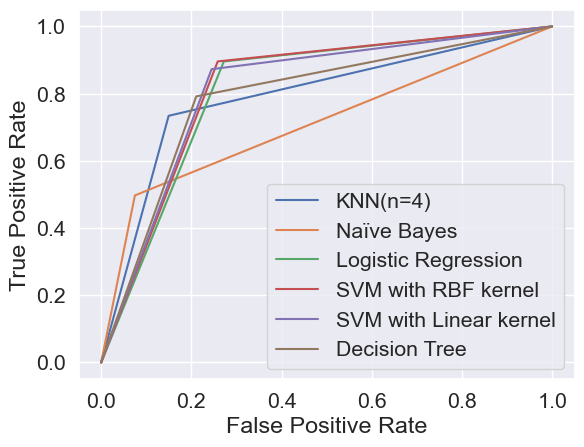

In [73]:

models = [KNeighborsClassifier(n_neighbors=4),
    GaussianNB(),
    LogisticRegression(penalty="l2", max_iter=100), 
    svm.SVC(kernel='rbf', C=10, gamma=0.01), 
    svm.SVC(kernel='linear', C=1, gamma=0.1),
    tree.DecisionTreeClassifier()]
models_name = ["KNN(n=4)",
    "Naïve Bayes",
    "Logistic Regression", 
    "SVM with RBF kernel",
    "SVM with Linear kernel",
    "Decision Tree"]
new_df = model_eval(models, models_name, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [74]:
new_df

,Model,Train Accuracy,Test Accuracy,F1 Score,AUC score
0,KNN(n=4),0.861719,0.787500,0.787600,0.792222
1,Naïve Bayes,0.982031,0.693750,0.682101,0.711140
2,Logistic Regression,0.881250,0.818750,0.816838,0.811922
3,SVM with RBF kernel,0.829688,0.825000,0.823395,0.818725
4,SVM with Linear kernel,0.971094,0.818750,0.817743,0.813967
5,Decision Tree,0.998437,0.790625,0.790841,0.790512


In [ ]:
mytree = tree.DecisionTreeClassifier()
mytree.fit(X_train_tfidf, np.ravel(y_train))
plt.figure(figsize=(20,20))
features = X_train_tfidf.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()


In [ ]:
'''
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_tfidf, y_train)
'''

In [184]:
'''
print(grid.best_params_)
'''

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [209]:
'''
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
'''

In [ ]:
'''
plot_search_results(grid)
grid.cv_results_.keys()
'''


In [ ]:
'''
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
grid = GridSearchCV(knn_2, hyperparameters, cv=5)

#Fit the model
best_model = grid.fit(X_train_tfidf, np.ravel(y_train))
'''